<a href="https://colab.research.google.com/github/Manasa672/Loan_Amount_Prediction/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing packages
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/project1/Loan_Amount_Prediction.csv')
df.head()

,Customer_ID,Age,Gender,Education_Level,Employment_Status,Income,Credit_Score,Loan_Amount,Loan_Term,Existing_Debt,Property_Type
0,f39b590e-a01d-449d-bfb9-1c1f23b39b75,48,Female,Undergraduate,Unemployed,124934.0,438.0,34666.0,48,12279,Condo
1,42a04df2-a6a3-4a65-838a-eb8eb0caa25a,40,Male,High School,Unemployed,86844.0,366.0,NaN,24,1802,House
2,da2b2072-df4f-4079-a52b-22f49a74e410,49,Male,High School,Self-Employed,129205.0,307.0,2487.0,36,18730,Apartment
3,c054a71b-325e-476a-a88c-ef48e65add9b,52,Male,High School,Unemployed,31501.0,636.0,40270.0,24,5116,House
4,77d8c8e7-0b4d-4407-b16a-24d4c51c45a9,55,Female,Graduate,Employed,86840.0,527.0,3212.0,36,6852,Condo


In [8]:
# See the no. of rows and columns
df.shape

(856, 11)

In [9]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Gender', 'Education_Level', 'Employment_Status', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Existing_Debt', 'Property_Type']


In [10]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Gender,object
Education_Level,object
Employment_Status,object
Income,float64
Credit_Score,float64
Loan_Amount,float64
Loan_Term,int64
Existing_Debt,int64


In [11]:
df.describe()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Existing_Debt
count,856.000000,797.000000,778.000000,826.000000,856.000000,856.000000
mean,44.503505,84867.496863,578.548843,25085.796610,35.761682,9843.459112
std,14.690968,36779.426396,161.677638,14207.805774,17.043164,5707.853724
min,18.000000,20132.000000,301.000000,1114.000000,12.000000,40.000000
25%,33.000000,54322.000000,437.250000,12776.500000,24.000000,5073.500000
50%,44.500000,84813.000000,578.500000,25217.000000,36.000000,9906.500000
75%,57.000000,116151.000000,726.000000,37378.500000,48.000000,14541.500000
max,69.000000,149993.000000,849.000000,49975.000000,60.000000,19993.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        856 non-null    object 
 1   Age                856 non-null    int64  
 2   Gender             856 non-null    object 
 3   Education_Level    856 non-null    object 
 4   Employment_Status  856 non-null    object 
 5   Income             797 non-null    float64
 6   Credit_Score       778 non-null    float64
 7   Loan_Amount        826 non-null    float64
 8   Loan_Term          856 non-null    int64  
 9   Existing_Debt      856 non-null    int64  
 10  Property_Type      856 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 73.7+ KB


In [13]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Education_Level,0
Employment_Status,0
Income,59
Credit_Score,78
Loan_Amount,30
Loan_Term,0
Existing_Debt,0


In [14]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove

In [15]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns

Index(['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term',
       'Existing_Debt'],
      dtype='object')

In [16]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [17]:
# find the null values
df.isnull().sum()

,0
Age,0
Gender,0
Education_Level,0
Employment_Status,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Existing_Debt,0
Property_Type,0


In [18]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [28]:
df.head()

,Customer_ID,Age,Gender,Education_Level,Employment_Status,Income,Credit_Score,Loan_Amount,Loan_Term,Existing_Debt,Property_Type
0,f39b590e-a01d-449d-bfb9-1c1f23b39b75,0.588235,0,2,2,0.807032,0.250000,0.686683,0.75,0.613391,1
1,42a04df2-a6a3-4a65-838a-eb8eb0caa25a,0.431373,1,1,2,0.513719,0.118613,NaN,0.25,0.088308,2
2,da2b2072-df4f-4079-a52b-22f49a74e410,0.607843,1,1,1,0.839921,0.010949,0.028100,0.50,0.936701,0
3,c054a71b-325e-476a-a88c-ef48e65add9b,0.666667,1,1,2,0.087547,0.611314,0.801375,0.25,0.254398,2
4,77d8c8e7-0b4d-4407-b16a-24d4c51c45a9,0.725490,0,0,0,0.513688,0.412409,0.042938,0.50,0.341402,1


In [19]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [30]:
df.head()

,Customer_ID,Age,Gender,Education_Level,Employment_Status,Income,Credit_Score,Loan_Amount,Loan_Term,Existing_Debt,Property_Type
0,f39b590e-a01d-449d-bfb9-1c1f23b39b75,0.588235,0,2,2,0.807032,0.250000,0.686683,0.75,0.613391,1
1,42a04df2-a6a3-4a65-838a-eb8eb0caa25a,0.431373,1,1,2,0.513719,0.118613,NaN,0.25,0.088308,2
2,da2b2072-df4f-4079-a52b-22f49a74e410,0.607843,1,1,1,0.839921,0.010949,0.028100,0.50,0.936701,0
3,c054a71b-325e-476a-a88c-ef48e65add9b,0.666667,1,1,2,0.087547,0.611314,0.801375,0.25,0.254398,2
4,77d8c8e7-0b4d-4407-b16a-24d4c51c45a9,0.725490,0,0,0,0.513688,0.412409,0.042938,0.50,0.341402,1


In [20]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Loan_Amount', axis=1)  # -- independent variable
y = df['Loan_Amount'] # -- dependent variable

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [24]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08011925107877457
Mean Absolute Error: 0.24154652266808752
R-squared: -0.03161730791367723


In [25]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [27]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08802992248802878
Mean Absolute Error: 0.25163506466829555
R-squared: -0.13347529376754785


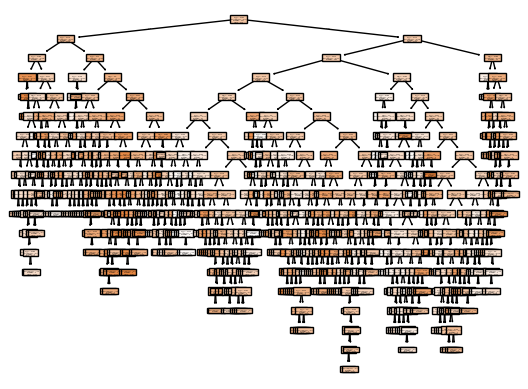

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [29]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [30]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
